In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from src import utils
import streak_cut
import numpy as np
import astropy.io.fits as fits
import os
from tqdm import tqdm
from src.datasets.datasets import create_dataset_strips
# from datasets import split_data
import matplotlib.pyplot as plt
import pandas as pd


In [223]:
create_dataset_strips(32)

Creating strips: 100%|██████████| 245/245 [00:39<00:00,  6.15it/s]


In [30]:
def get_strip_file_name(row: pd.Series):
    return f"{row['file_name']}_strip_{row['extension']}_{row['ID']}.npy"

def get_strip_file_name_from_items(file_name: str, extension: str, id: str):
    return f"{file_name}_strip_{extension}_{id}.npy"
    
def get_strip_file_path_from_items(file_name: str, extension: str, id: str):
    filename = f"{file_name}_strip_{extension}_{id}.npy"
    return os.path.join(utils.get_project_root(), 'datasets', 'strips_181024',filename)

def get_strip_file_path(row: pd.Series, strips_path=None):
    if not strips_path:
        strips_path = os.path.join(utils.get_project_root(), 'datasets', 'strips_181024')
    
    filename = f"{row['file_name']}_strip_{row['extension']}_{row['ID']}.npy"
    return os.path.join(strips_path, filename)
    # return get_strip_file_name(row['file_name'], row['extension'], row['ID'])

In [21]:
good_data = utils.read_streaks_csv()

# Do basic data analysis
max_img_height = 0
max_img_width = 0
# min img initialized to python max value
min_img_height = 5000
min_img_width = 5000
flattened_data = np.array([])
for idx, row in tqdm(good_data.iterrows(), total=good_data.shape[0]):
    img = np.load(get_strip_file_path(row))
    img_height, img_width = img.shape
    if img_height > max_img_height:
        max_img_height = img_height
    if img_width > max_img_width:
        max_img_width = img_width
    if img_height < min_img_height:
        min_img_height = img_height
    if img_width < min_img_width:
        min_img_width = img_width
    # Flatten the image
    flattened_data = np.concatenate((flattened_data, img.flatten()))

100%|██████████| 1186/1186 [02:04<00:00,  9.56it/s]


Mean: 3928.6051228840765, median:724.0, std: 4911.294793720979, min: 0.0, max: 65535.0
Image height; min: 32, max: 32
Image width; min: 175, max: 4408
7.368269016255226


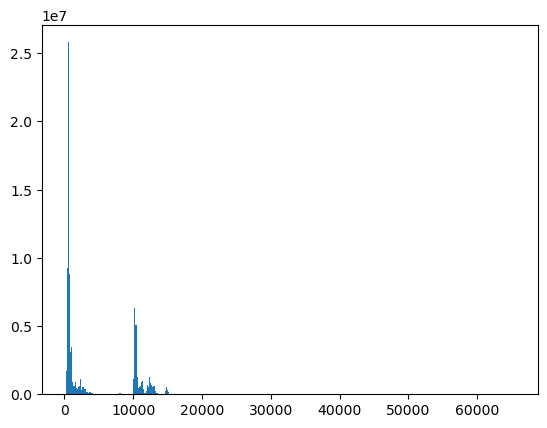

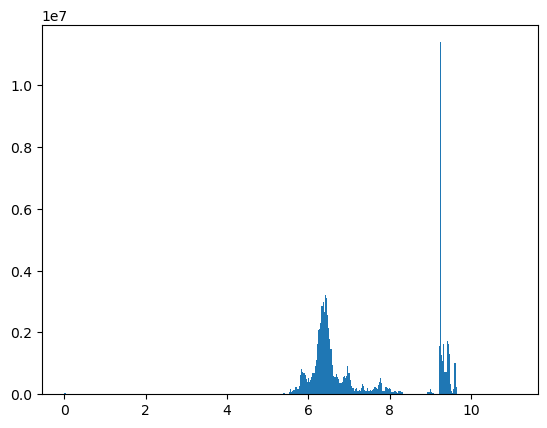

In [22]:
# Calculate the mean, median, std, min, max of the flattened data
mean = np.mean(flattened_data)
median = np.median(flattened_data)
std = np.std(flattened_data)
min_val = np.min(flattened_data)
max_val = np.max(flattened_data)
print(f"Mean: {mean}, median:{median}, std: {std}, min: {min_val}, max: {max_val}")

print(f"Image height; min: {min_img_height}, max: {max_img_height}")
print(f"Image width; min: {min_img_width}, max: {max_img_width}")

log_flattened_data = np.log(flattened_data + 1)
print(log_flattened_data.mean())
# Show a histogram of the data as well as the log of the data
plt.hist(flattened_data, bins=400)
plt.show()
plt.hist(log_flattened_data, bins=400)
plt.show()




In [78]:
# Put the number of pixels with value higher than 20000 in a flattened array
big_values = np.array([])
for idx, row in tqdm(good_data.iterrows(), total=good_data.shape[0]):
    img = np.load(get_strip_file_path(row))
    big_values = np.concatenate((big_values, img[(img > 20000) & (img < 65535)]))

100%|██████████| 1185/1185 [00:00<00:00, 3909.53it/s]


21919


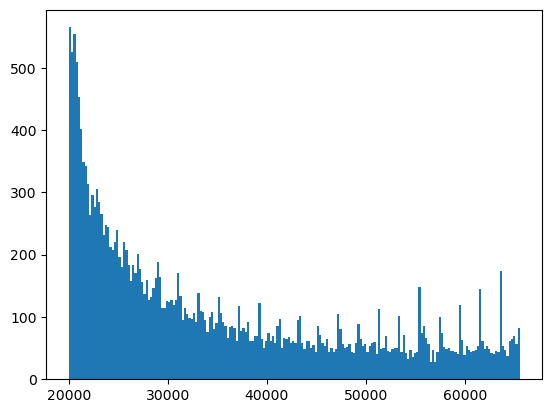

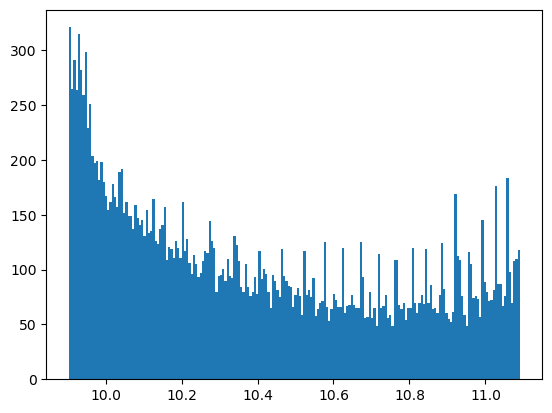

In [79]:
print(big_values.shape[0])
# Show a histogram of the data as well as the log of the data
plt.hist(big_values, bins=200)
plt.show()
plt.hist(np.log(big_values + 1), bins=200)
plt.show()


100%|██████████| 1185/1185 [00:00<00:00, 4732.30it/s]


Mean: 2259.7400843881856, median: 2061.0, std: 955.3266205090055, min: 207.0, max: 4408.0


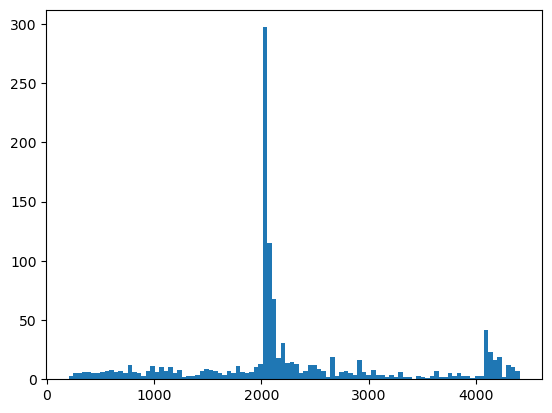

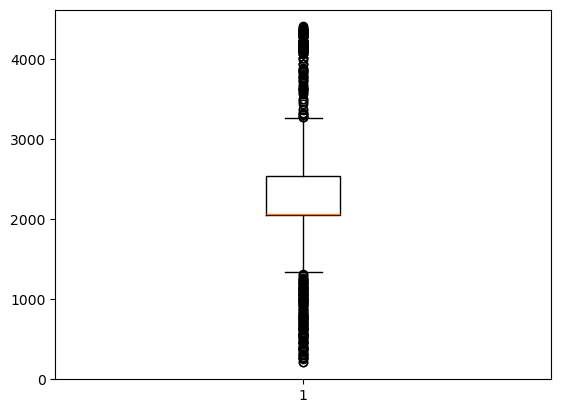

In [84]:
# Show image width distribution
widths = np.zeros((good_data.shape[0], 1))
for idx, row in tqdm(good_data.iterrows(), total=good_data.shape[0]):
    img = np.load(get_strip_file_path(row))
    widths[idx] = img.shape[1]

print(f"Mean: {np.mean(widths)}, median: {np.median(widths)}, std: {np.std(widths)}, min: {np.min(widths)}, max: {np.max(widths)}")
plt.hist(widths, bins=100)
plt.show()
plt.boxplot(widths)
plt.show()

In [83]:
# Load one image
img = np.load(get_strip_file_path(good_data.iloc[0]))
img.dtype

dtype('uint16')

In [93]:
def create_auxiliary_data_csv():
    good_data = utils.read_streaks_csv().iloc[0:1]
    for idx, row in tqdm(good_data.iterrows(), total=good_data.shape[0]):
        with fits.open(utils.get_fits_path(row['file_name'])) as hdul:
            header = hdul[0].header
            for key in header.keys():
                print(key, header[key])
        

In [94]:
create_auxiliary_data_csv()

  0%|          | 0/1 [00:00<?, ?it/s]

SIMPLE True
BITPIX 16
NAXIS 0
EXTEND True
ORIGIN ESO-PARANAL
DATE 2023-10-23T11:19:33
TELESCOP ESO-VST
INSTRUME OMEGACAM
OBJECT STD,ZEROPOINT
RA 13.8
DEC 0.93278
EQUINOX 2000.0
RADECSYS FK5
EXPTIME 75.0
MJD-OBS 59581.024988914
DATE-OBS 2022-01-02T00:35:59.042
UTC 2151.0
LST 9647.016
PI-COI UNKNOWN
OBSERVER UNKNOWN
ESO ADA ABSROT END -43.2446
ESO ADA ABSROT PPOS POS
ESO ADA ABSROT START -42.88306
ESO ADA GUID STATUS OFF
ESO ADA POSANG 0.0
ESO DET BITS 16
ESO DET CHIPS 32
ESO DET DATE 2004-11-10
ESO DET DEC 0.0
ESO DET DID ESO-VLT-DIC.OMEGA_CCD,ESO-VLT-DIC.FCDDCS
ESO DET EXP NO 231
ESO DET EXP RDTTIME 30.599
ESO DET EXP TYPE Normal
ESO DET EXP XFERTIM 30.534
ESO DET FRAM ID 1
ESO DET FRAM TYPE Normal
ESO DET ID CCD FIERA - Rev: 238334
ESO DET NAME ocmsci1 - ocmsci1
ESO DET OUTPUTS 32
ESO DET OUTREF 0
ESO DET RA 0.0
ESO DET READ CLOCK mosaic read (ordered)
ESO DET READ MODE normal
ESO DET READ NFRAM 1
ESO DET READ SPEED normal
ESO DET SHUT ID OmegaCAM (Bonn) SE132
ESO DET SHUT TMCLOS -0.8

100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

In [18]:
# Create csv file with  data
good_data = pd.read_csv(os.path.join(utils.get_project_root(), 'good_data.csv'))
keys_of_interest = ['HIERARCH ESO TEL AMBI IRSKY TEMP',
                    'HIERARCH ESO TEL AMBI TEMP',
                    'HIERARCH ESO TEL AMBI WINDSP',
                    'HIERARCH ESO TEL AMBI PRES START',
                    'HIERARCH ESO TEL AMBI FWHM START',
                    'HIERARCH ESO TEL AMBI RHUM',
                    'HIERARCH ESO TEL AMBI TAU0'
                    ]
columns = ['file_name', 'IRSKY_TEMP', 'TEMP', 'WINDSP', 'PRES', 'FWHM', 'RHUM', 'TAU0']
 
auxiliary_data = pd.DataFrame(columns=columns)
file_names = good_data['file_name'].unique()
for idx, file_name in tqdm(enumerate(file_names), total=len(file_names)):
    with fits.open(utils.get_fits_path(file_name)) as hdul:
        header = hdul[0].header
        data = [file_name]
        for key in keys_of_interest:
            if key in header:
                data.append(header[key])
            else:
                print(f"Key {key} not found in header. Appending NaN")
                data.append(np.nan)
        auxiliary_data.loc[idx] = data

# Save the auxiliary data to a csv file
auxiliary_data.to_csv(os.path.join(utils.get_project_root(), 'datasets', 'auxiliary_data.csv'), index=False)
                

100%|██████████| 245/245 [00:01<00:00, 218.00it/s]


In [20]:
# Create csv file with labels
good_data = utils.read_streaks_csv()

labels = good_data[['file_name', 'extension', 'ID', 'ang_vel[deg/s]']]
labels.to_csv(os.path.join(utils.get_project_root(), 'datasets', 'labels.csv'), index=False)



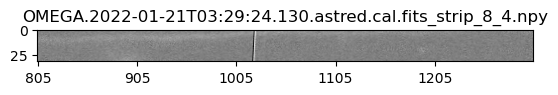

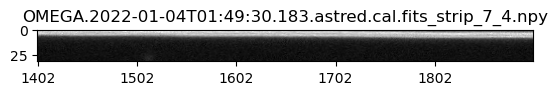

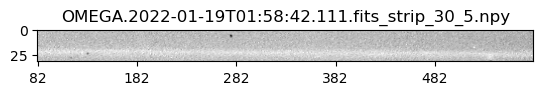

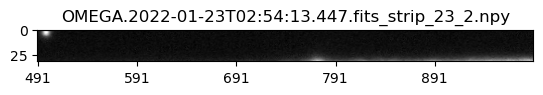

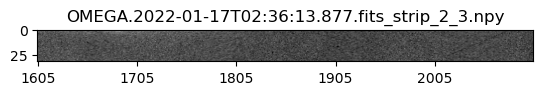

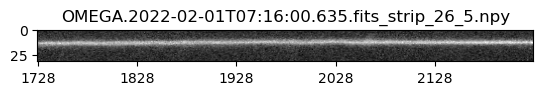

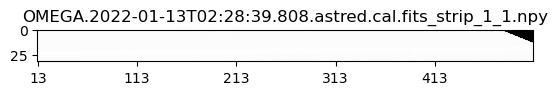

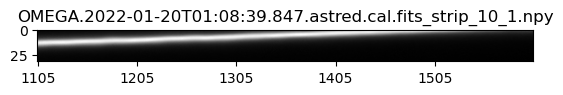

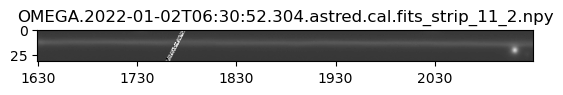

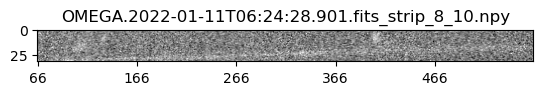

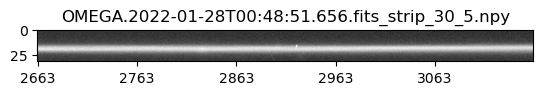

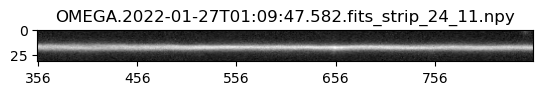

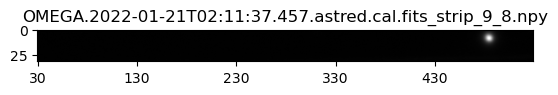

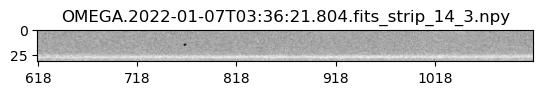

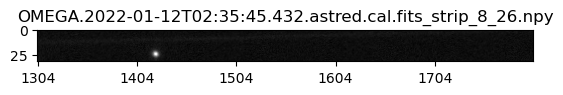

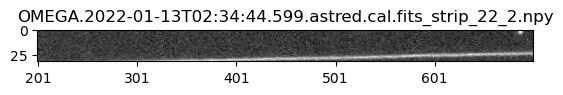

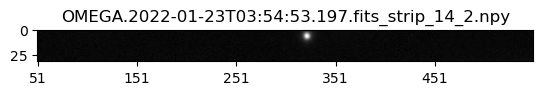

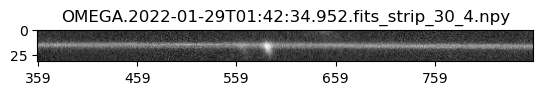

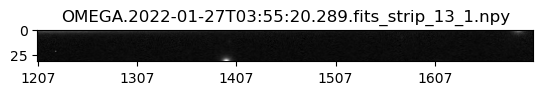

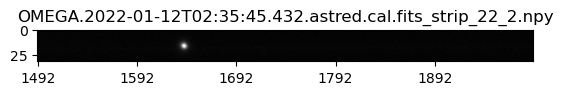

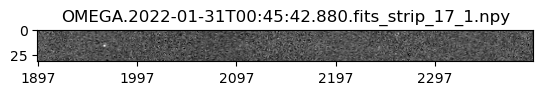

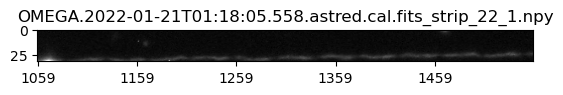

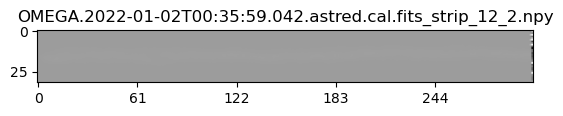

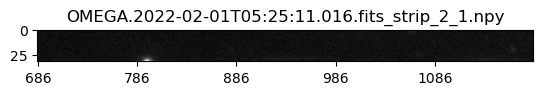

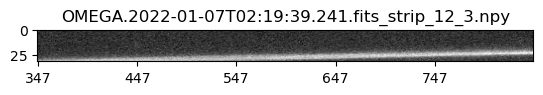

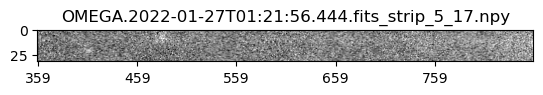

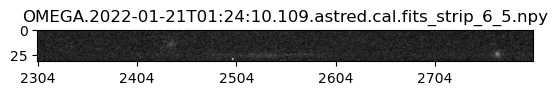

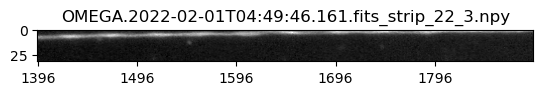

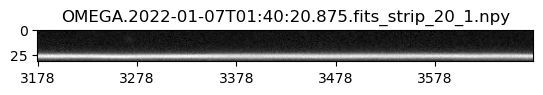

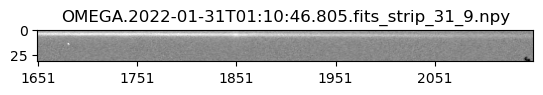

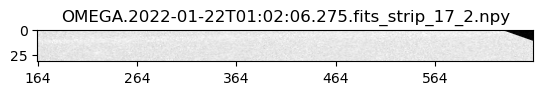

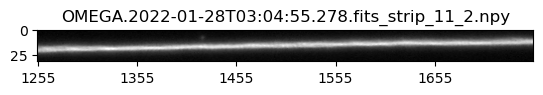

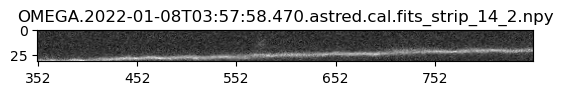

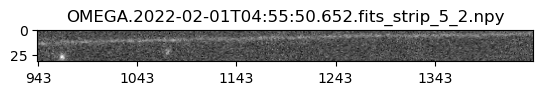

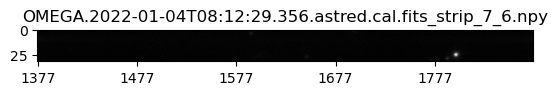

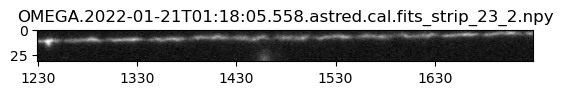

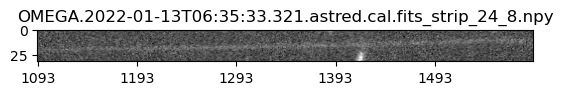

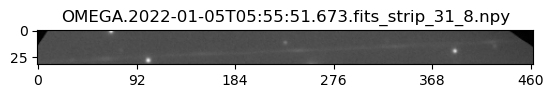

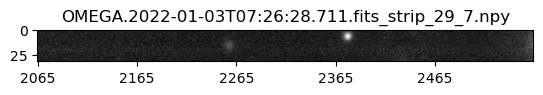

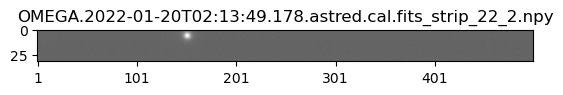

In [224]:
# Visually inspect the images
good_data = utils.read_streaks_csv()
for idx, row in good_data.sample(40).iterrows():
    img = np.load(get_strip_file_path(row))
    target_width = 500
    start = np.random.randint(0,max( img.shape[1] - target_width , 1))
    length = min(target_width, img.shape[1] - start)
    plt.imshow(np.log(img[:, start:start + length]+1), cmap='gray')
    tick_interval = length // 5
    plt.xticks(np.arange(0, length, tick_interval), np.arange(start, start + length, tick_interval))
    plt.title(get_strip_file_name(row))
    plt.show()

In [220]:
good_data = pd.read_csv(os.path.join(utils.get_project_root(), 'good_data.csv'))
wrong_count = 0
wrong_rows = []


for idx, row in good_data.iterrows():
    name = row['file_name']
    good_ID = row['ID']
    good_extension = row['extension']
    good_x_start = row['x_start[px]']
    good_y_start = row['y_start[px]']
    good_x_end = row['x_end[px]']
    good_y_end = row['y_end[px]']

    streaks_data = pd.read_csv(utils.get_streaks_path(name))
    streaks_row = streaks_data[(streaks_data['ID'] == good_ID) & (streaks_data['#extension'] == good_extension)]
    if streaks_row.empty:
        print(f"Streaks file does not contain ID {good_ID} and extension {good_extension}")
        continue
    # px = '[px]' if 'x_start[px]' in streaks_row.columns else ""
    # streaks_x_start = streaks_row['x_start' + px].values[0]
    # streaks_y_start = streaks_row['y_start' + px].values[0]
    # streaks_x_end = streaks_row['x_end' + px].values[0]
    # streaks_y_end = streaks_row['y_end' + px].values[0]
    if 'x_start[px]' in streaks_row.columns:
        streaks_x_start = streaks_row['x_start[px]'].values[0]
        streaks_y_start = streaks_row['y_start[px]'].values[0]
        streaks_x_end = streaks_row['x_end[px]'].values[0]
        streaks_y_end = streaks_row['y_end[px]'].values[0]
    else:
        streaks_x_start = streaks_row['start_x'].values[0]
        streaks_y_start = streaks_row['start_y'].values[0]
        streaks_x_end = streaks_row['end_x'].values[0]
        streaks_y_end = streaks_row['end_y'].values[0]

    if good_x_start != streaks_x_start or good_y_start != streaks_y_start or good_x_end != streaks_x_end or good_y_end != streaks_y_end:
        wrong_count += 1
        wrong_rows.append( (name, good_ID, good_extension))

        print(f"File name: {name} - ID: {good_ID} - Extension: {good_extension} does not match.")
        # print(f"Good data: {good_x_start}, {good_y_start}, {good_x_end}, {good_y_end}")
        # print(f"Streaks data: {streaks_x_start}, {streaks_y_start}, {streaks_x_end}, {streaks_y_end}")
        # tqdm.write(f"Good data:    {good_x_start}, {good_y_start}, {good_x_end}, {good_y_end}")
        # tqdm.write(f"Streaks data: {streaks_x_start}, {streaks_y_start}, {streaks_x_end}, {streaks_y_end}")

print(f"Wrong count: {wrong_count}")

Wrong count: 0


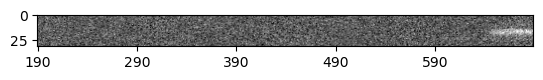

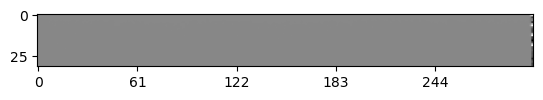

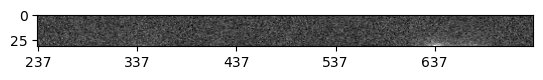

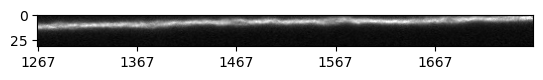

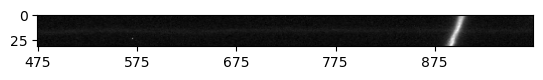

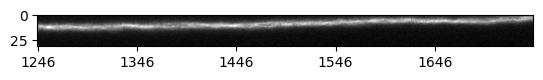

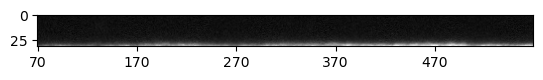

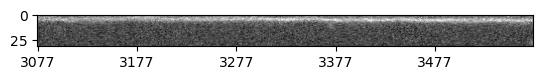

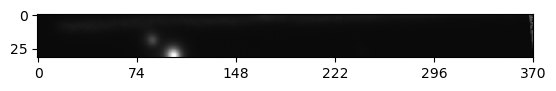

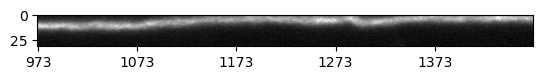

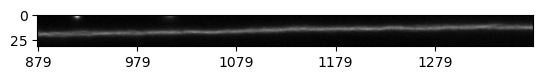

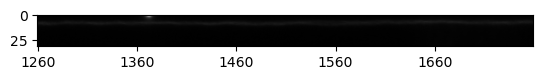

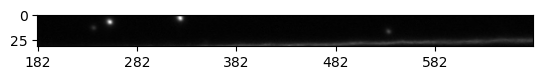

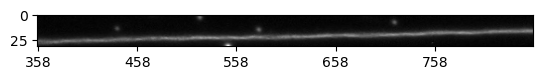

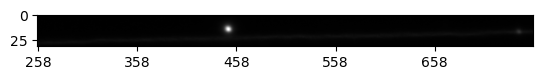

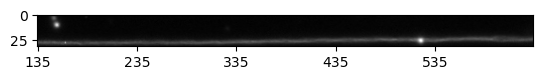

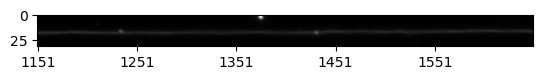

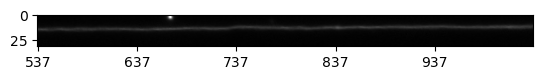

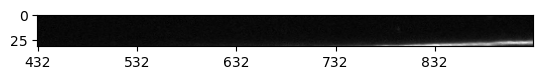

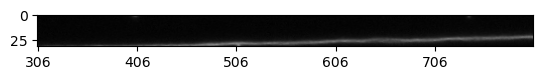

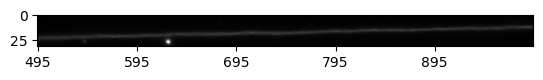

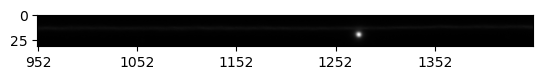

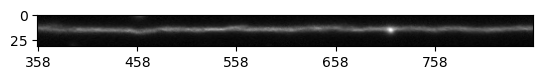

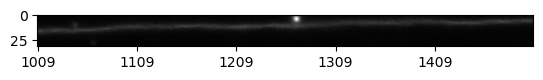

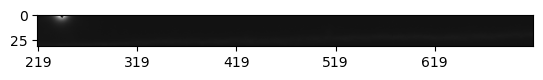

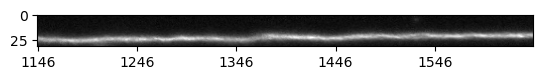

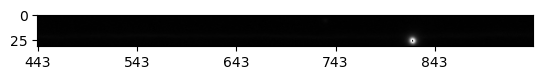

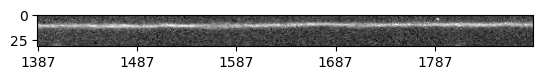

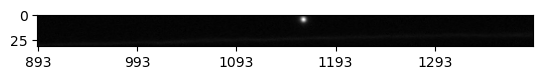

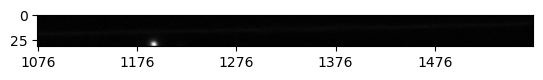

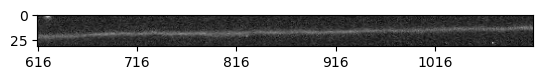

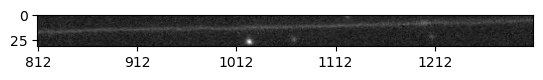

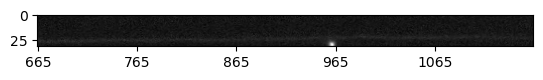

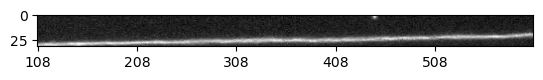

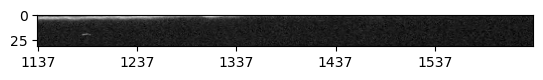

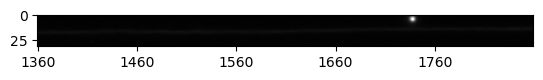

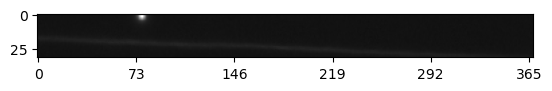

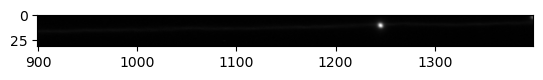

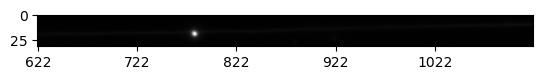

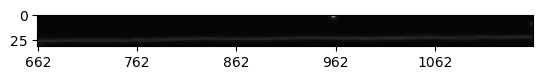

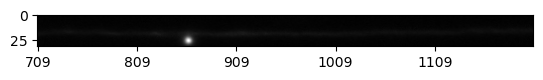

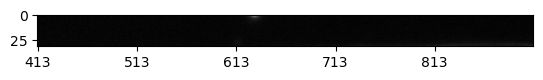

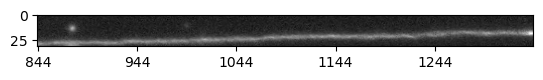

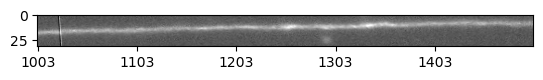

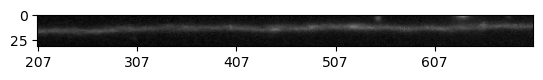

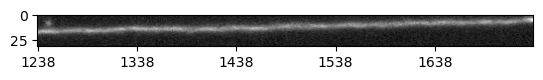

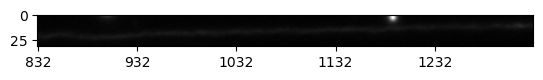

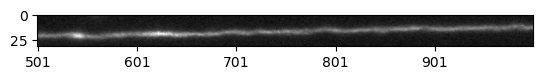

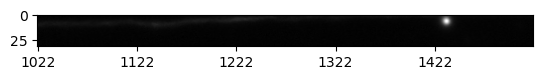

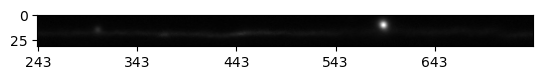

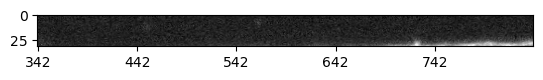

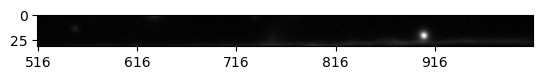

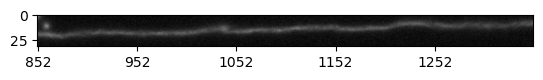

In [219]:
# wrong_rows contains tuples of file_name, id, extension

# Print the cutout for each wrong row
for file_name, id, extension in wrong_rows:
    path = get_strip_file_path_from_items(file_name, extension, id)
    img = np.load(path)
    target_width = 500
    start = np.random.randint(0,max( img.shape[1] - target_width , 1))
    length = min(target_width, img.shape[1] - start)
    plt.imshow(np.log(img[:, start:start + length]+1), cmap='gray')
    # length = img.shape[1]
    # plt.imshow(img, cmap='gray')
    tick_interval = length // 5
    plt.xticks(np.arange(0, length, tick_interval), np.arange(start, start + length, tick_interval))
    plt.show()
    # plt.imshow(np.log(img), cmap='gray')
    # plt.show()
    

In [177]:
plt.rcParams['image.cmap'] = 'gray'
# plt.rcParams['image.cmap'] = 'viridis'


In [221]:


good_data = pd.read_csv(os.path.join(utils.get_project_root(), 'good_data.csv'))
for name, id, extension in wrong_rows:
    good_row = good_data[(good_data['file_name'] == name) & (good_data['extension'] == extension) & (good_data['ID'] == id)]
    streaks_data = pd.read_csv(utils.get_streaks_path(name))
    streaks_row = streaks_data[(streaks_data['ID'] == id) & (streaks_data['#extension'] == extension)]
    good_x_start = good_row['x_start[px]'].values[0]
    good_y_start = good_row['y_start[px]'].values[0]
    good_x_end = good_row['x_end[px]'].values[0]
    good_y_end = good_row['y_end[px]'].values[0]
    if 'x_start[px]' in streaks_row.columns:
        streaks_x_start = streaks_row['x_start[px]'].values[0]
        streaks_y_start = streaks_row['y_start[px]'].values[0]
        streaks_x_end = streaks_row['x_end[px]'].values[0]
        streaks_y_end = streaks_row['y_end[px]'].values[0]
    else:
        streaks_x_start = streaks_row['start_x'].values[0]
        streaks_y_start = streaks_row['start_y'].values[0]
        streaks_x_end = streaks_row['end_x'].values[0]
        streaks_y_end = streaks_row['end_y'].values[0]
    with fits.open(utils.get_fits_path(name)) as hdul:
        data = hdul[extension].data
    data = np.log(data)
    fig, axs = plt.subplots(1,3, sharey=True )
    axs[0].imshow(data)
    axs[1].imshow(data)
    axs[1].plot([good_x_start, good_x_end], [good_y_start, good_y_end] ) 
    axs[2].imshow(data)
    axs[2].plot([streaks_x_start, streaks_x_end], [streaks_y_start, streaks_y_end] )
    plt.show()




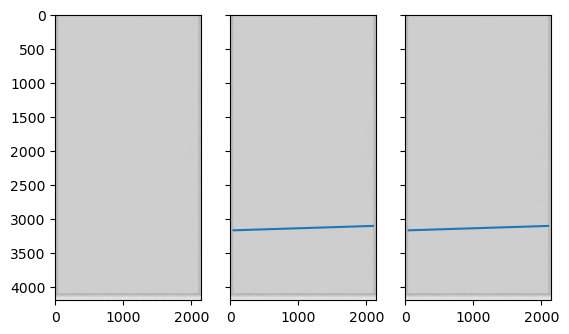

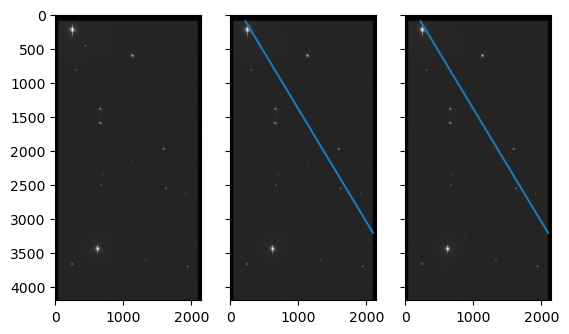

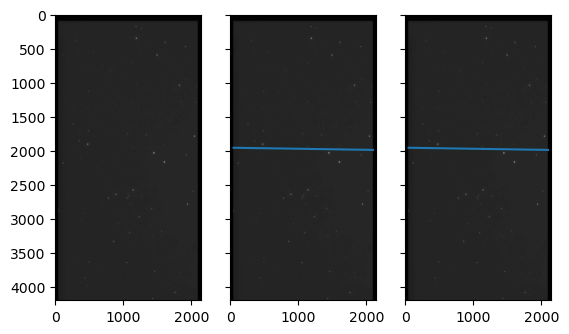

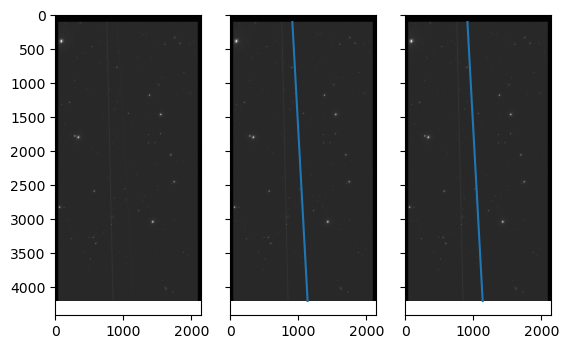

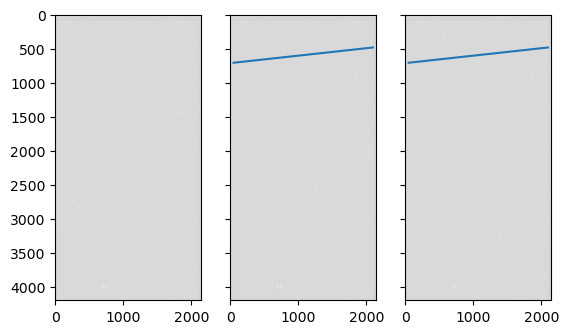

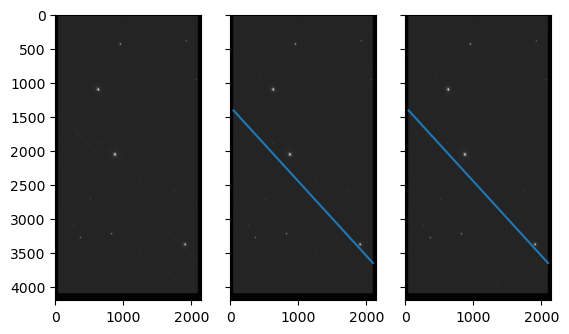

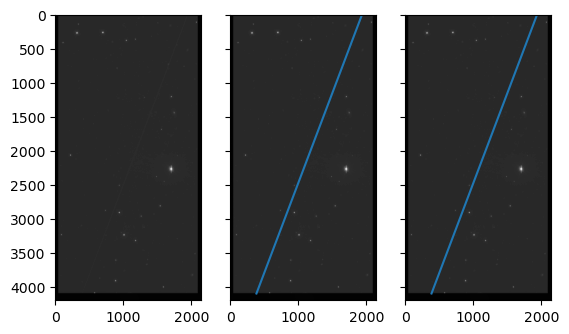

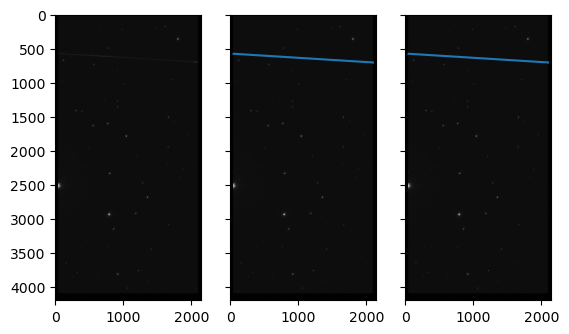

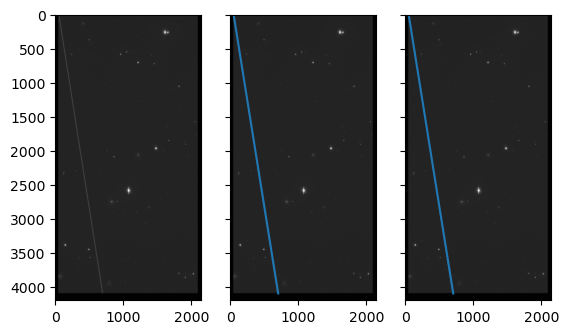

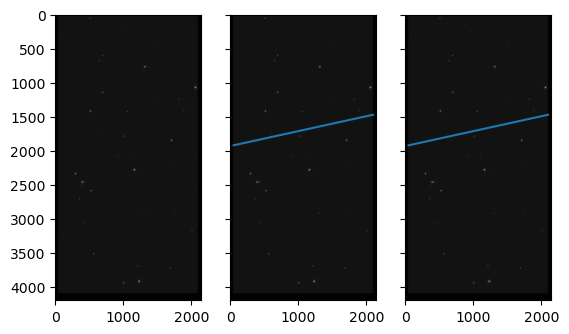

In [222]:
good_data = pd.read_csv(os.path.join(utils.get_project_root(), 'good_data.csv'))
for idx, row in good_data.sample(10).iterrows():
    name = row['file_name']
    extension = row['extension']
    id = row['ID']
    good_row = good_data[(good_data['file_name'] == name) & (good_data['extension'] == extension) & (good_data['ID'] == id)]
    streaks_data = pd.read_csv(utils.get_streaks_path(name))
    streaks_row = streaks_data[(streaks_data['ID'] == id) & (streaks_data['#extension'] == extension)]
    good_x_start = good_row['x_start[px]'].values[0]
    good_y_start = good_row['y_start[px]'].values[0]
    good_x_end = good_row['x_end[px]'].values[0]
    good_y_end = good_row['y_end[px]'].values[0]
    if 'x_start[px]' in streaks_row.columns:
        streaks_x_start = streaks_row['x_start[px]'].values[0]
        streaks_y_start = streaks_row['y_start[px]'].values[0]
        streaks_x_end = streaks_row['x_end[px]'].values[0]
        streaks_y_end = streaks_row['y_end[px]'].values[0]
    else:
        streaks_x_start = streaks_row['start_x'].values[0]
        streaks_y_start = streaks_row['start_y'].values[0]
        streaks_x_end = streaks_row['end_x'].values[0]
        streaks_y_end = streaks_row['end_y'].values[0]
    with fits.open(utils.get_fits_path(name)) as hdul:
        data = hdul[extension].data
    data = np.log(data)
    fig, axs = plt.subplots(1,3, sharey=True )
    axs[0].imshow(data, cmap='gray')
    axs[1].imshow(data)
    axs[1].plot([good_x_start, good_x_end], [good_y_start, good_y_end] )
    axs[2].imshow(data)
    axs[2].plot([streaks_x_start, streaks_x_end], [streaks_y_start, streaks_y_end] )
    plt.show()


In [186]:
import shutil

for name, id, extension in wrong_rows:
    path = get_strip_file_path_from_items(name, extension, id)
    # Copy the file to datasets/strips_181024/backup
    backup_path = os.path.join(utils.get_project_root(), 'datasets', 'strips_181024', 'backup', get_strip_file_name_from_items(name, extension, id))
    shutil.copy2(path, backup_path)

In [187]:
# print wrongrows in csv format:
for name, id, extension in wrong_rows:
    print(f"{name},{id},{extension}")

OMEGA.2022-01-02T00:35:59.042.astred.cal.fits,1,12
OMEGA.2022-01-02T00:35:59.042.astred.cal.fits,2,12
OMEGA.2022-01-02T00:35:59.042.astred.cal.fits,3,13
OMEGA.2022-01-02T00:35:59.042.astred.cal.fits,4,25
OMEGA.2022-01-02T00:35:59.042.astred.cal.fits,5,25
OMEGA.2022-01-02T00:35:59.042.astred.cal.fits,6,26
OMEGA.2022-01-02T00:35:59.042.astred.cal.fits,7,27
OMEGA.2022-01-02T00:35:59.042.astred.cal.fits,8,29
OMEGA.2022-01-02T03:19:53.631.astred.cal.fits,1,23
OMEGA.2022-01-02T03:19:53.631.astred.cal.fits,2,24
OMEGA.2022-01-04T03:08:57.016.astred.cal.fits,18,6
OMEGA.2022-01-04T03:08:57.016.astred.cal.fits,20,7
OMEGA.2022-01-04T03:08:57.016.astred.cal.fits,24,8
OMEGA.2022-01-04T03:08:57.016.astred.cal.fits,8,22
OMEGA.2022-01-04T03:08:57.016.astred.cal.fits,9,23
OMEGA.2022-01-04T03:08:57.016.astred.cal.fits,10,24
OMEGA.2022-01-06T02:57:46.595.astred.cal.fits,4,5
OMEGA.2022-01-06T02:57:46.595.astred.cal.fits,5,6
OMEGA.2022-01-06T02:57:46.595.astred.cal.fits,6,7
OMEGA.2022-01-06T02:57:46.595.ast

In [193]:
name, id, extension = "OMEGA.2022-01-02T00:35:59.042.astred.cal.fits",1,12

root = utils.get_project_root()

combined_df = pd.read_csv(os.path.join(root, 'combined_streaks.csv'))
      

streaks_df = pd.read_csv(utils.get_streaks_path(name))

correlated_df = pd.read_csv(os.path.join(root, 'data/r_SDSS.correlated_streaks_fixed.csv'))

good_df = pd.read_csv(os.path.join(root, 'good_data.csv'))
print(good_df[
          (good_df['file_name'] == name) 
          & (good_df['ID'] == id) & (good_df['extension'] == extension )]
                [['x_start[px]', 'y_start[px]', 'x_end[px]', 'y_end[px]']]
      )
print(correlated_df[ 
          (correlated_df['file_name'] == name) 
          & (correlated_df['ID'] == id) 
          & (correlated_df['extension'] == extension )] [['x_start[px]', 'y_start[px]', 'x_end[px]', 'y_end[px]']])

print(streaks_df[ 
            (streaks_df['ID'] == id)
          & (streaks_df['#extension'] == extension )] [['x_start[px]', 'y_start[px]', 'x_end[px]', 'y_end[px]']])

print(combined_df[
          (combined_df['file_name'] == name)
          & (combined_df['ID'] == id)
          & (combined_df['extension'] == extension )] [['x_start[px]', 'y_start[px]', 'x_end[px]', 'y_end[px]']])


   x_start[px]  y_start[px]  x_end[px]  y_end[px]
0       1232.0        100.0     2096.0     2662.2
   x_start[px]  y_start[px]  x_end[px]  y_end[px]
0       1232.0        100.0     2096.0     2662.2
   x_start[px]  y_start[px]  x_end[px]  y_end[px]
0       1438.0        715.0     2096.0     2648.0
     x_start[px]  y_start[px]  x_end[px]  y_end[px]
924       1438.0        715.0     2096.0     2648.0


In [218]:
combined_df = pd.read_csv(os.path.join(root, 'combined_streaks.csv'))
good_df = pd.read_csv(os.path.join(root, 'good_data.csv'))
new_df = combined_df[['file_name', 'extension', 'ID', 'x_start[px]', 'y_start[px]',  'x_end[px]',  'y_end[px]', 'ang_vel[deg/s]']]

new_df = new_df
for idx, row in new_df.iterrows():
    # check if ang_vel is nan
    if np.isnan(row['ang_vel[deg/s]']):
        # set it as ang_vel from good
        good_row = good_df[
            (good_df['file_name'] == row['file_name'])
            & (good_df['ID'] == row['ID'])
            & (good_df['extension'] == row['extension'])
        ]
        if not good_row['ang_vel[deg/s]'].empty:
            new_df.loc[idx, 'ang_vel[deg/s]'] = good_row['ang_vel[deg/s]'].values[0]
print(len(new_df))
new_df = new_df.dropna()
print(len(new_df))
new_df.to_csv(os.path.join(root, 'good_data.csv'), index=False)

1230
1186


In [28]:
# Go through each row in good_data and load the strip image. 
# Cut it into three parts, the first 256px, middle 256px, and last 256px.
# Arrange these horizontally in a subplot with a shared y axis.
# Make the x axis ticks be correct for the pixels in the image


def cut_image_to_bounds(img: np.ndarray, start: int, end: int, target_width: int):
    if start < 0:
        start = 0
    if end > img.shape[1]:
        end = img.shape[1]
    if end - start < target_width:
        start = max(0, end - target_width)
    return img[:, start:end], start, end
    

good_data = pd.read_csv(os.path.join(utils.get_project_root(), 'good_data.csv'))
for idx, row in tqdm(good_data.iterrows(), total=good_data.shape[0]):
    img = np.load(get_strip_file_path(row))
    img = img.astype(np.float64)
    img = np.log(img + 1)
    
    target_width = 256
    img_min = img.min()
    img_max = img.max()
    img_1, start_1, end_1 = cut_image_to_bounds(img, 0, target_width, target_width)
    img_2, start_2, end_2 = cut_image_to_bounds(img, img.shape[1]//2 - target_width//2, img.shape[1]//2 + target_width//2, target_width)
    img_3, start_3, end_3 = cut_image_to_bounds(img, img.shape[1] - target_width, img.shape[1], target_width)
    img_min = img_2.min()
    img_max = img_2.max()
    fig, axs = plt.subplots(3,1, sharey=True )
    axs[0].imshow(img_1, cmap='gray', vmin=img_min, vmax=img_max)
    axs[1].imshow(img_2, cmap='gray', vmin=img_min, vmax=img_max)
    axs[2].imshow(img_3, cmap='gray', vmin=img_min, vmax=img_max)
    tick_interval = target_width // 3
    tick_positions = np.arange(start_1, end_1, tick_interval)
    tick_labels_1 = np.arange(start_1, end_1, tick_interval)
    tick_labels_2 = np.arange(start_2, end_2, tick_interval)
    tick_labels_3 = np.arange(start_3, end_3, tick_interval)
    axs[0].set_xticks(tick_positions)
    axs[0].set_xticklabels(tick_labels_1)
    axs[1].set_xticks(tick_positions)
    axs[1].set_xticklabels(tick_labels_2)
    axs[2].set_xticks(tick_positions)
    axs[2].set_xticklabels(tick_labels_3)
    # Add title
    title = get_strip_file_name(row)[:-4]
    plt.suptitle(title, y=0.8)
    plt.subplots_adjust(top=0.7, wspace=0.1)
    plt.savefig(os.path.join(utils.get_project_root(), 'data', 'figures', 'strips_analysis', title + ".png"), format='png', dpi=300)
    plt.close(fig)


  0%|          | 0/1186 [00:00<?, ?it/s]


NameError: name 'get_strip_file_path' is not defined

In [19]:
good_data = pd.read_csv(os.path.join(utils.get_project_root(), 'good_data.csv'))
file_names_train, file_names_val, file_names_test = split_data()

train = good_data[good_data['file_name'].isin(file_names_train)]
val = good_data[good_data['file_name'].isin(file_names_val)]
test = good_data[good_data['file_name'].isin(file_names_test)]
total = len(train) + len(val) + len(test)
print(f"Train: {len(train)} ({len(train)/total:.2f})")
print(f"Val: {len(val)} ({len(val)/total:.2f})")
print(f"Test: {len(test)} ({len(test)/total:.2f})")




seed 1115
seed 1116
Train: 996 (0.84)
Val: 105 (0.09)
Test: 85 (0.07)


100%|██████████| 958/958 [00:00<00:00, 4795.06it/s]


Mean: 2263.2098121085596, median: 2061.0, std: 975.4172785287154, min: 175.0, max: 4408.0


100%|██████████| 113/113 [00:00<00:00, 4775.09it/s]


Mean: 2261.7964601769913, median: 2061.0, std: 921.8172237324331, min: 269.0, max: 4321.0


100%|██████████| 115/115 [00:00<00:00, 4571.82it/s]


Mean: 2204.5304347826086, median: 2053.0, std: 822.171000109801, min: 371.0, max: 4379.0


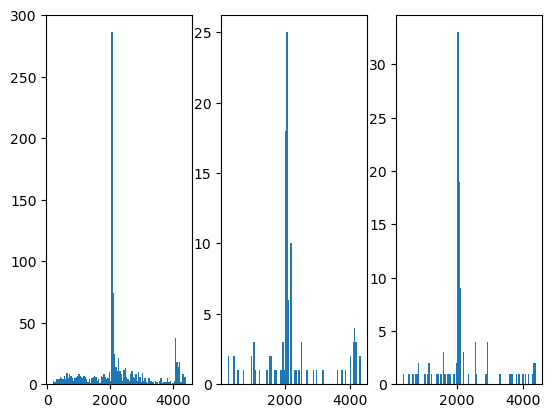

In [10]:
# Show image width distribution
widths = np.zeros((train.shape[0], 1))
for i, (idx, row) in enumerate(tqdm(train.iterrows(), total=train.shape[0])):
    img = np.load(get_strip_file_path(row))
    widths[i] = img.shape[1]

fig, axs = plt.subplots(1,3)

print(f"Mean: {np.mean(widths)}, median: {np.median(widths)}, std: {np.std(widths)}, min: {np.min(widths)}, max: {np.max(widths)}")
axs[0].hist(widths, bins=100)

widths = np.zeros((val.shape[0], 1))
for i, (idx, row) in enumerate(tqdm(val.iterrows(), total=val.shape[0])):
    img = np.load(get_strip_file_path(row))
    widths[i] = img.shape[1]

print(f"Mean: {np.mean(widths)}, median: {np.median(widths)}, std: {np.std(widths)}, min: {np.min(widths)}, max: {np.max(widths)}")
axs[1].hist(widths, bins=100)

widths = np.zeros((test.shape[0], 1))
for i, (idx, row) in enumerate(tqdm(test.iterrows(), total=test.shape[0])):
    img = np.load(get_strip_file_path(row))
    widths[i] = img.shape[1]

print(f"Mean: {np.mean(widths)}, median: {np.median(widths)}, std: {np.std(widths)}, min: {np.min(widths)}, max: {np.max(widths)}")
axs[2].hist(widths, bins=100)
plt.show()


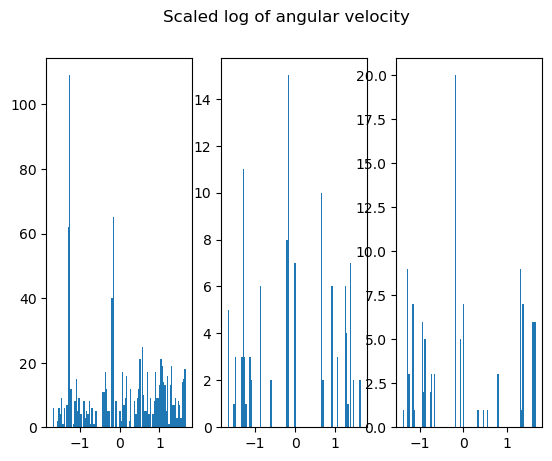

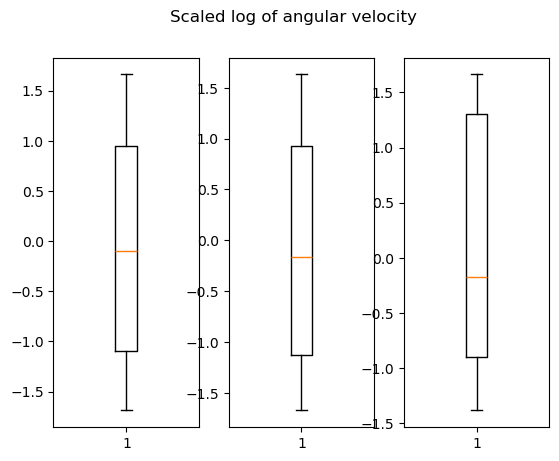

In [15]:
targets = pd.read_csv(os.path.join(utils.get_project_root(), 'datasets/labels.csv'))

train_targets = targets[targets['file_name'].isin(file_names_train)][['ang_vel[deg/s]']].to_numpy()
val_targets = targets[targets['file_name'].isin(file_names_val)][['ang_vel[deg/s]']].to_numpy()
test_targets = targets[targets['file_name'].isin(file_names_test)][['ang_vel[deg/s]']].to_numpy()

epsilon = 1e-6
train_targets_log = np.log(train_targets + epsilon)
val_targets_log = np.log(val_targets + epsilon)
test_targets_log = np.log(test_targets + epsilon)

train_mean = np.mean(train_targets_log)
train_std = np.std(train_targets_log)

# Scale the targets
train_targets_scaled = (train_targets_log - train_mean) / train_std
val_targets_scaled = (val_targets_log - train_mean) / train_std
test_targets_scaled = (test_targets_log - train_mean) / train_std

# Show histograms:
fig, axs = plt.subplots(1,3)
fig.suptitle("Scaled log of angular velocity")
axs[0].hist(train_targets_scaled, bins=100)
axs[1].hist(val_targets_scaled, bins=100)
axs[2].hist(test_targets_scaled, bins=100)
plt.show()

# Show boxplots 
fig, axs = plt.subplots(1,3)
fig.suptitle("Scaled log of angular velocity")
axs[0].boxplot(train_targets_scaled)
axs[1].boxplot(val_targets_scaled)
axs[2].boxplot(test_targets_scaled)
plt.show()



In [26]:
# Examine the distribution or mag_errors from the .lc files

good_data = pd.read_csv(os.path.join(utils.get_project_root(), 'good_data.csv'))

missing_file_count = 0
mag_errs = []
for idx, row in good_data.iterrows():
    name = row['file_name']
    extension = row['extension']
    id = row['ID']
    lc_path = utils.get_lc_path(name, extension, id)
    try:
        lc_df = pd.read_csv(lc_path, skiprows=4)
        mag_errs.append(lc_df[' mag_err'].mean())
    except FileNotFoundError:
        continue
    except KeyError as e:
        print(f"KeyError: {e}")
        print(f"Excisting columns: {lc_df.columns}")
        continue
        
mag_errs = np.array(mag_errs)

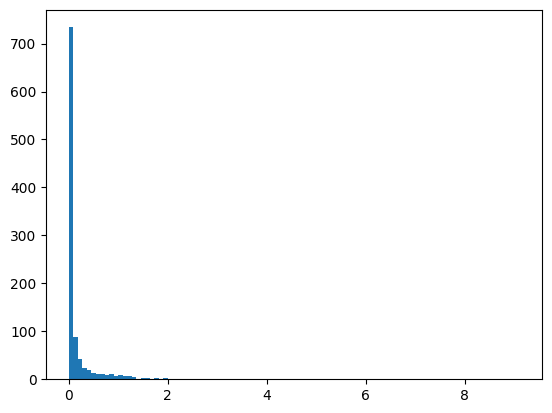

In [29]:
plt.hist(mag_errs, bins=100)
plt.show()

In [30]:
# Calculate basic statistics
mean = np.mean(mag_errs)
median = np.median(mag_errs)
std = np.std(mag_errs)
min_val = np.min(mag_errs)
max_val = np.max(mag_errs)
print(f"Mean: {mean}, median:{median}, std: {std}, min: {min_val}, max: {max_val}")

Mean: 0.17840965460971642, median:0.03724763725490196, std: 0.495558158634318, min: 0.001383695652173913, max: 9.107326923076922


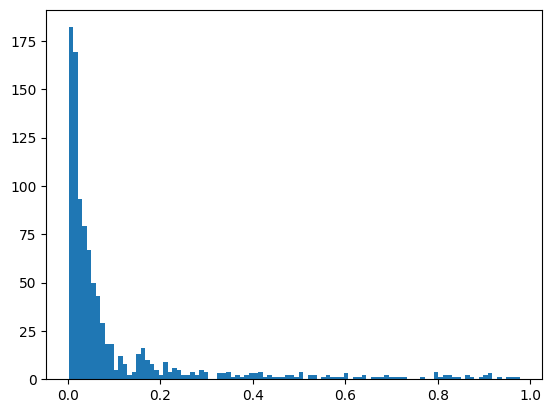

In [32]:
# Exclude the outliers
mag_errs_no_outliers = mag_errs[mag_errs < 2*std]
plt.hist(mag_errs_no_outliers, bins=100)
plt.show()

In [40]:
# Calculate the quartiles of the data
q1 = np.percentile(mag_errs, 25)
q2 = np.percentile(mag_errs, 50)
q3 = np.percentile(mag_errs, 75)
_90th = np.percentile(mag_errs, 90)

print(f"Q1: {q1}, Q2: {q2}, Q3: {q3}, 90th percentile: {_90th}")

Q1: 0.014829961649089165, Q2: 0.03724763725490196, Q3: 0.1125402216088328, 90th percentile: 0.47905879307284155


In [46]:
# Create a copy of good_data that only contains rows where mag_errs is in the nth percentile

def copy_best_nth_percent(n: int):
        
    mag_err_means = []
    rows_to_drop = []
    
    for idx, row in good_data.iterrows():
        name = row['file_name']
        extension = row['extension']
        id = row['ID']
        lc_path = utils.get_lc_path(name, extension, id)
        try:
            lc_df = pd.read_csv(lc_path, skiprows=4)
            mag_err_mean = lc_df[' mag_err'].mean()
            mag_err_means.append((idx, mag_err_mean))
        except FileNotFoundError:
            continue
    mag_err_values = [mean for _, mean in mag_err_means]
    nth_percentile = np.percentile(mag_err_values, n)
    
    rows_to_keep = [idx for idx, mean in mag_err_means if mean <= nth_percentile]
    good_data_nth = good_data.loc[rows_to_keep].copy()
    good_data_nth.to_csv(os.path.join(utils.get_project_root(), f'good_data_{n}th.csv'), index=False)


In [47]:
copy_best_nth_percent(70)
copy_best_nth_percent(80)
copy_best_nth_percent(90)

In [49]:
# Create csv file with auxiliary data for nth percent:
def auxiliary_best_nth(n):
    try:
        good_data = pd.read_csv(os.path.join(utils.get_project_root(), f'good_data_{n}th.csv'))
    except FileNotFoundError:
        print(f"File good_data_{n}th.csv not found")
        return
    keys_of_interest = ['HIERARCH ESO TEL AMBI IRSKY TEMP',
                        'HIERARCH ESO TEL AMBI TEMP',
                        'HIERARCH ESO TEL AMBI WINDSP',
                        'HIERARCH ESO TEL AMBI PRES START',
                        'HIERARCH ESO TEL AMBI FWHM START',
                        'HIERARCH ESO TEL AMBI RHUM',
                        'HIERARCH ESO TEL AMBI TAU0'
                        ]
    columns = ['file_name', 'IRSKY_TEMP', 'TEMP', 'WINDSP', 'PRES', 'FWHM', 'RHUM', 'TAU0']
    
    auxiliary_data = pd.DataFrame(columns=columns)
    file_names = good_data['file_name'].unique()
    for idx, file_name in tqdm(enumerate(file_names), total=len(file_names)):
        with fits.open(utils.get_fits_path(file_name)) as hdul:
            header = hdul[0].header
            data = [file_name]
            for key in keys_of_interest:
                if key in header:
                    data.append(header[key])
                else:
                    print(f"Key {key} not found in header. Appending NaN")
                    data.append(np.nan)
            auxiliary_data.loc[idx] = data
    
    # Save the auxiliary data to a csv file
    auxiliary_data.to_csv(os.path.join(utils.get_project_root(), 'datasets', f'auxiliary_data_{n}th.csv'), index=False)
                

In [50]:
# Create csv file with labels for nth percent
# Create csv file with labels
def labels_best_nth(n):
    try:
        good_data = pd.read_csv(os.path.join(utils.get_project_root(), f'good_data_{n}th.csv'))
    except FileNotFoundError:
        print(f"File good_data_{n}th.csv not found")
        return
    labels = good_data[['file_name', 'extension', 'ID', 'ang_vel[deg/s]']]
    labels.to_csv(os.path.join(utils.get_project_root(), 'datasets', f'targets_{n}th.csv'), index=False)


In [51]:
auxiliary_best_nth(70)
auxiliary_best_nth(80)
auxiliary_best_nth(90)

labels_best_nth(70)
labels_best_nth(80)
labels_best_nth(90)


100%|██████████| 198/198 [00:00<00:00, 210.79it/s]


In [33]:
from artificial_strips import generate_sine_images

num_images = 10
images, images_df = generate_sine_images(num_images, 400, 600, 1, 2, save_data=False)


Generating images: 100%|██████████| 10/10 [00:00<00:00, 583.30it/s]


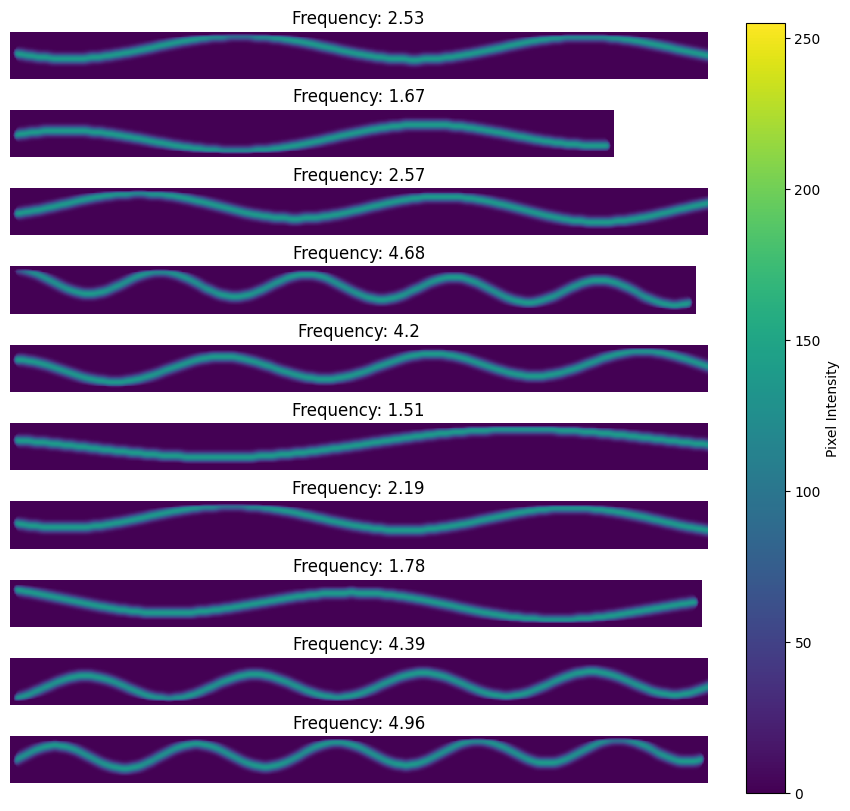

In [34]:
# Find the global minimum and maximum values across all images to set a shared color scale
vmin = 0
vmax = max(max(255, img.max()) for img in images)

# Create a figure with shared color scale and a single colorbar
fig, axs = plt.subplots(num_images, 1, figsize=(10,1*num_images), sharex=True)

# Plot each image with the same color scale
for idx, (ax, img) in enumerate(zip(axs, images)):
    im = ax.imshow(img, vmin=vmin, vmax=vmax)
    ax.axis('off')
    frequency = images_df.iloc[idx]['frequency']
    ax.set_title(f"Frequency: {frequency:.3}")
# Add a single colorbar to the right side of the entire figure
cbar = fig.colorbar(im, ax=axs, orientation='vertical', fraction=0.05, pad=0.05)
cbar.set_label('Pixel Intensity')

plt.show()

In [42]:
images, images_df = generate_sine_images(10000, 400, 600, 1, 2, save_data=True)

Generating images: 100%|██████████| 10000/10000 [00:12<00:00, 825.93it/s]


All images and parameters saved in "/home/dofri/epfl/semester_project/datasets/artificial_strips".


In [12]:
from src.datasets.artificial_strips import generate_sine_images
from src import utils
images, images_df = generate_sine_images(10000, 600, 600, 1, 2, save_data=True, output_dir=utils.path_from_proot( 'src/datasets/artificial_strips/w600px'))


Generating images: 100%|██████████| 10000/10000 [00:13<00:00, 743.04it/s]



All images and parameters saved in "/home/dofri/epfl/semester_project/src/datasets/artificial_strips/w600px".


In [19]:
good_data = pd.read_csv(os.path.join(utils.get_project_root(), 'good_data.csv'))
column_set = set()
for idx, row in tqdm(good_data.iterrows(), total=good_data.shape[0]):
    name = row['file_name']
    extension = row['extension']
    id = row['ID']
    lc_path = utils.get_lc_path(name, extension, id)
    try:
        lc_df = pd.read_csv(lc_path, skiprows=4)
        for column in lc_df.columns:
            column_set.add(column)
    except FileNotFoundError:
        continue
print(column_set)

100%|██████████| 1186/1186 [00:01<00:00, 1179.72it/s]

{' mag_err', ' x_px', ' x_px.1', ' mag', '#mjd_start'}


In [25]:
# Create a new good data with start and end coordinates from .lc file
good_data = pd.read_csv(os.path.join(utils.get_project_root(), 'good_data.csv'))
new_data = good_data.copy()

for idx, row in tqdm(new_data.iterrows(), total=new_data.shape[0]):
    name = row['file_name']
    extension = row['extension']
    id = row['ID']
    lc_path = utils.get_lc_path(name, extension, id)
    try:
        lc_df = pd.read_csv(lc_path, skiprows=4)
        length = lc_df.shape[0]
        new_data.loc[idx, 'x_start[px]'] = lc_df[' x_px'].values[0]
        new_data.loc[idx, 'y_start[px]'] = lc_df[' x_px.1'].values[0]
        new_data.loc[idx, 'x_end[px]'] = lc_df[' x_px'].values[length-1]
        new_data.loc[idx, 'y_end[px]'] = lc_df[' x_px.1'].values[length-1]
    except FileNotFoundError:
        # Set coordinates to NaN
        new_data.loc[idx, 'x_start[px]'] = np.nan
        new_data.loc[idx, 'y_start[px]'] = np.nan
        new_data.loc[idx, 'x_end[px]'] = np.nan
        new_data.loc[idx, 'y_end[px]'] = np.nan
    except KeyError as e:
        print(f"KeyError: {e}")
        print(f"Excisting columns: {lc_df.columns}")
        continue
# Drop rows where coordinates are nan
new_data = new_data.dropna(subset=['x_start[px]', 'y_start[px]', 'x_end[px]', 'y_end[px]'])
print(new_data.shape[0])
new_data.to_csv(os.path.join(utils.get_project_root(), 'good_data_lc.csv'), index=False)


100%|██████████| 1186/1186 [00:02<00:00, 558.70it/s]

1012


In [27]:
create_dataset_strips(32, dest_path= utils.path_from_proot('src/datasets/strips_171124_lc'), data_csv_path= utils.path_from_proot('good_data_lc.csv'))




Creating strips: 100%|██████████| 213/213 [00:33<00:00,  6.36it/s]


In [40]:
create_dataset_strips(50, dest_path= utils.path_from_proot('src/datasets/strips_141224_lc_50'), data_csv_path= utils.path_from_proot('good_data_lc.csv'))


Creating strips: 100%|██████████| 213/213 [00:34<00:00,  6.23it/s]


In [31]:


good_data = pd.read_csv(os.path.join(utils.get_project_root(), 'good_data_lc.csv'))
for idx, row in tqdm(good_data.iterrows(), total=good_data.shape[0]):
    img = np.load(get_strip_file_path(row, strips_path= utils.path_from_proot('src/datasets/strips_171124_lc')))
    img = img.astype(np.float64)
    img = np.log(img + 1)

    target_width = 256
    img_min = img.min()
    img_max = img.max()
    img_1, start_1, end_1 = cut_image_to_bounds(img, 0, target_width, target_width)
    img_2, start_2, end_2 = cut_image_to_bounds(img, img.shape[1]//2 - target_width//2, img.shape[1]//2 + target_width//2, target_width)
    img_3, start_3, end_3 = cut_image_to_bounds(img, img.shape[1] - target_width, img.shape[1], target_width)
    img_min = img_2.min()
    img_max = img_2.max()
    fig, axs = plt.subplots(3,1, sharey=True )
    axs[0].imshow(img_1, cmap='gray', vmin=img_min, vmax=img_max)
    axs[1].imshow(img_2, cmap='gray', vmin=img_min, vmax=img_max)
    axs[2].imshow(img_3, cmap='gray', vmin=img_min, vmax=img_max)
    tick_interval = target_width // 3
    tick_positions = np.arange(start_1, end_1, tick_interval)
    tick_labels_1 = np.arange(start_1, end_1, tick_interval)
    tick_labels_2 = np.arange(start_2, end_2, tick_interval)
    tick_labels_3 = np.arange(start_3, end_3, tick_interval)
    axs[0].set_xticks(tick_positions)
    axs[0].set_xticklabels(tick_labels_1)
    axs[1].set_xticks(tick_positions)
    axs[1].set_xticklabels(tick_labels_2)
    axs[2].set_xticks(tick_positions)
    axs[2].set_xticklabels(tick_labels_3)
    # Add title
    title = get_strip_file_name(row)[:-4]
    plt.suptitle(title, y=0.8)
    plt.subplots_adjust(top=0.7, wspace=0.1)
    plt.savefig(utils.path_from_proot('data/figures/strips_analysis_171124_lc/' + title + ".png"), format='png', dpi=300)
    plt.close(fig)


Creating strips:   0%|          | 0/213 [14:55<?, ?it/s]

100%|██████████| 1012/1012 [04:25<00:00,  3.81it/s]


In [40]:
# original_cmap = plt.get_cmap('viridis')
# colors = original_cmap(np.linspace(0, 1, 10000))  # Increase resolution
# high_res_cmap = ListedColormap(colors)
# 

min_val = np.inf
max_val = -np.inf

# find min and max pixel values
good_data = pd.read_csv(os.path.join(utils.get_project_root(), 'good_data_lc.csv'))
for idx, row in tqdm(good_data.iterrows(), total=good_data.shape[0]):
    img = np.load(get_strip_file_path(row, strips_path= utils.path_from_proot('src/datasets/strips_171124_lc')))
    img = img.astype(np.float64)
    min_val = min(min_val, img.min())
    max_val = max(max_val, img.max())
print(f"Min: {min_val}, Max: {max_val}")

100%|██████████| 1012/1012 [00:00<00:00, 2542.30it/s]

Min: 0.0, Max: 65535.0


In [43]:
from matplotlib.colors import ListedColormap

original_cmap = plt.get_cmap('viridis')
colors = original_cmap(np.linspace(0, 65535, 65536))  # Increase resolution
high_res_cmap = ListedColormap(colors)
# 

good_data = pd.read_csv(os.path.join(utils.get_project_root(), 'good_data_lc.csv'))
number = 10

# for idx, row in tqdm(good_data.iterrows(), total=good_data.shape[0]):
for idx, row in tqdm(good_data.sample(number).iterrows(), total=number):
    img = np.load(get_strip_file_path(row, strips_path= utils.path_from_proot('src/datasets/strips_171124_lc')))
    img = img.astype(np.float64)

    target_width = 256
    img_1, start_1, end_1 = cut_image_to_bounds(img, 0, target_width, target_width)
    img_2, start_2, end_2 = cut_image_to_bounds(img, img.shape[1]//2 - target_width//2, img.shape[1]//2 + target_width//2, target_width)
    img_3, start_3, end_3 = cut_image_to_bounds(img, img.shape[1] - target_width, img.shape[1], target_width)
    img_min = 0
    img_max = 65535
    fig, axs = plt.subplots(3,1, sharey=True )
    axs[0].imshow(img_1, cmap='viridis', vmin=img_min, vmax=img_max)
    axs[1].imshow(img_2, cmap='viridis', vmin=img_min, vmax=img_max)
    axs[2].imshow(img_3, cmap='viridis', vmin=img_min, vmax=img_max)
    tick_interval = target_width // 3
    tick_positions = np.arange(start_1, end_1, tick_interval)
    tick_labels_1 = np.arange(start_1, end_1, tick_interval)
    tick_labels_2 = np.arange(start_2, end_2, tick_interval)
    tick_labels_3 = np.arange(start_3, end_3, tick_interval)
    axs[0].set_xticks(tick_positions)
    axs[0].set_xticklabels(tick_labels_1)
    axs[1].set_xticks(tick_positions)
    axs[1].set_xticklabels(tick_labels_2)
    axs[2].set_xticks(tick_positions)
    axs[2].set_xticklabels(tick_labels_3)
    # Add title
    title = get_strip_file_name(row)[:-4]
    plt.suptitle(title, y=0.8)
    plt.subplots_adjust(top=0.7, wspace=0.1)
    plt.savefig(utils.path_from_proot('data/figures/strips_analysis_171124_lc_color/' + title + ".png"), format='png', dpi=300)
    plt.close(fig)


100%|██████████| 10/10 [00:02<00:00,  3.74it/s]


100%|██████████| 1012/1012 [00:00<00:00, 5657.73it/s]


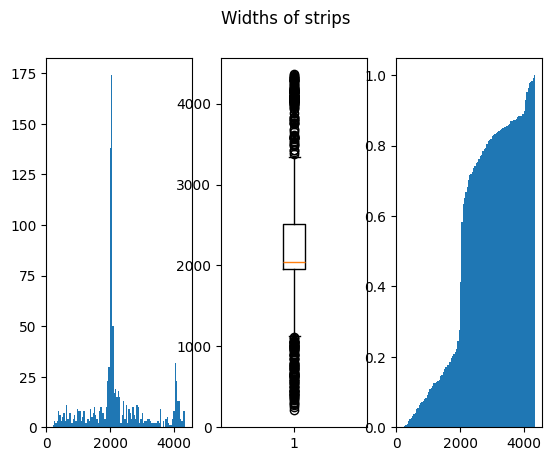

In [4]:
# iterate over .npy files in strips_171124_lc and create a histogram and boxplot and cumulative distribution
import os
import numpy as np
import matplotlib.pyplot as plt
from src import utils
from tqdm import tqdm

strips_path = utils.path_from_proot('src/datasets/strips_171124_lc')
widths = []
for file_name in tqdm(os.listdir(strips_path)):
    img = np.load(os.path.join(strips_path, file_name))
    widths.append(img.shape[1])
    
widths = np.array(widths)
fig, axs = plt.subplots(1,3)
fig.suptitle("Widths of strips")
axs[0].hist(widths, bins=100)
axs[1].boxplot(widths)
axs[2].hist(widths, bins=100, cumulative=True, density=True)

plt.show()


In [9]:
np.percentile(widths, 5)


np.float64(659.65)

In [21]:
# Combine streaks data into one csv.
good_data_lc = pd.read_csv(utils.path_from_proot('good_data_lc.csv'))
numeric = pd.read_csv(utils.path_from_proot('src/datasets/auxiliary_data.csv'))
targets = pd.read_csv(utils.path_from_proot('src/datasets/targets.csv'))

print(good_data_lc.shape)
print(numeric.shape)
print(targets.shape)

merged_w_targets = pd.merge(good_data_lc.drop(columns=['ang_vel[deg/s]']), targets, on=['file_name', 'extension', 'ID'], how='left')
print(merged_w_targets.shape)
print(merged_w_targets.columns)
all_combined = pd.merge(merged_w_targets, numeric, on='file_name', how='left')
print(all_combined.shape)
print(all_combined.columns)

all_combined.to_csv(utils.path_from_proot('src/datasets/combined_lc.csv'), index=False)
# check if ang_vel[deg/s]_x and ang_vel[deg/s]_y are equal everywhere
# print(merged[merged['ang_vel[deg/s]_x'] == merged['ang_vel[deg/s]_y']])

(1012, 10)
(245, 8)
(1186, 4)
(1012, 10)
Index(['Unnamed: 0', 'file_name', 'extension', 'ID', 'x_start[px]',
       'y_start[px]', 'x_end[px]', 'y_end[px]', 'width', 'ang_vel[deg/s]'],
      dtype='object')
(1012, 17)
Index(['Unnamed: 0', 'file_name', 'extension', 'ID', 'x_start[px]',
       'y_start[px]', 'x_end[px]', 'y_end[px]', 'width', 'ang_vel[deg/s]',
       'IRSKY_TEMP', 'TEMP', 'WINDSP', 'PRES', 'FWHM', 'RHUM', 'TAU0'],
      dtype='object')


In [16]:

data_df = pd.read_csv(utils.path_from_proot('src/datasets/combined_lc_wo_img_paths.csv'))

# Add strip file name to new column called image_name
for idx, row in data_df.iterrows():
    data_df.loc[idx, 'image_name'] = utils.get_strip_file_name(row)

data_df.to_csv(utils.path_from_proot('src/datasets/combined_lc.csv'))

Train: 32 samples, Val: 4 samples, Test: 4 samples
torch.Size([500, 32])
torch.Size([500, 32])
torch.Size([500, 32])
torch.Size([500, 32])
torch.Size([500, 32])
torch.Size([500, 32])
torch.Size([500, 32])
torch.Size([500, 32])
torch.Size([500, 32])
torch.Size([500, 32])


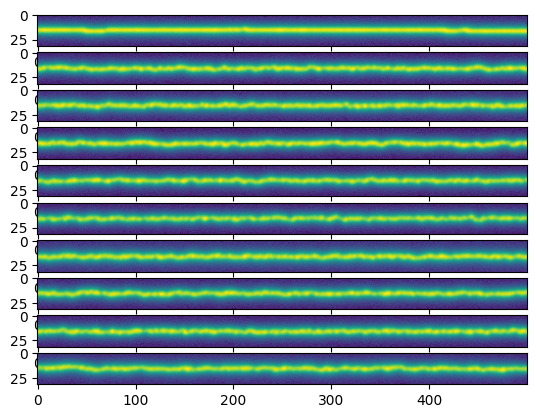

In [32]:
# Test data augmentation
from src.models.base_dataset import split_data_into_datasets_synthetic_32

augmentation_opt = {
    'horizontal_flip': True,
    'vertical_flip': True,
    'max_rotation': 10.0,       # degrees
    'max_translation': 5        # pixels
}
synthetic_dataset, synthetic_dfs = split_data_into_datasets_synthetic_32(no_samples=40)
n = 10
fig, ax = plt.subplots(n)
for i in range(n):
    img, label =  synthetic_dataset['train'].__getitem__(i)
    print(img.shape)
    ax[i].imshow(img.transpose(0,1))
plt.show()

Train: 32 samples, Val: 4 samples, Test: 4 samples
torch.Size([500, 32])
torch.Size([500, 32])
torch.Size([500, 32])
torch.Size([500, 32])
torch.Size([500, 32])
torch.Size([500, 32])
torch.Size([500, 32])
torch.Size([500, 32])
torch.Size([500, 32])
torch.Size([500, 32])


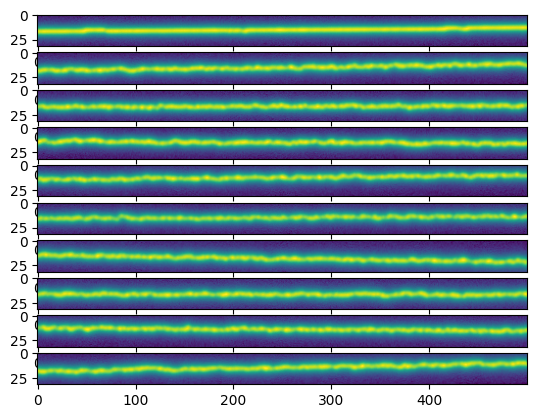

In [39]:
# Test data augmentation
from src.models.base_dataset import split_data_into_datasets_synthetic_50

augmentation_opts = {
    'horizontal_flip': True,
    'vertical_flip': True,
    'max_rotation': 1.0,       # degrees
    'max_translation': 2        # pixels
}
synthetic_dataset, synthetic_dfs = split_data_into_datasets_synthetic_50(no_samples=40, augmentation_opts=augmentation_opts)
n = 10
fig, ax = plt.subplots(n)
for i in range(n):
    img, label =  synthetic_dataset['train'].__getitem__(i)
    print(img.shape)
    ax[i].imshow(img.transpose(0,1))
plt.show()

Train: 30 samples, Val: 1 samples, Test: 9 samples
torch.Size([500, 32])
torch.Size([500, 32])
torch.Size([500, 32])
torch.Size([500, 32])
torch.Size([500, 32])
torch.Size([500, 32])
torch.Size([500, 32])
torch.Size([500, 32])
torch.Size([500, 32])
torch.Size([500, 32])


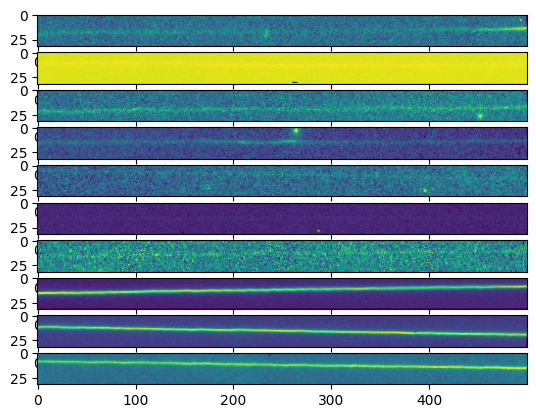

In [44]:
# Test data augmentation
from src.models.base_dataset import split_data_into_datasets_strips_141224_lc_50

augmentation_opts = {
    'horizontal_flip': True,
    'vertical_flip': True,
    'max_rotation': 1.0,       # degrees
    'max_translation': 5        # pixels
}
synthetic_dataset, synthetic_dfs = split_data_into_datasets_strips_141224_lc_50(no_samples=40, augmentation_opts=augmentation_opts)
n = 10
fig, ax = plt.subplots(n)
for i in range(n):
    img, label, numeric=  synthetic_dataset['train'].__getitem__(i)
    print(img.shape)
    ax[i].imshow(img.transpose(0,1))
plt.show()

(32, 2021)


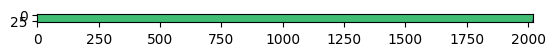

In [38]:
 x = np.load('/home/dofri/epfl/semester_project/src/datasets/strips_171124_lc/strips_171124_lc/OMEGA.2022-01-02T00:59:16.697.astred.cal.fits_strip_9_10.npy')
print(x.shape)
plt.imshow(x)

In [63]:
synthetic_dataset, synthetic_dfs = split_data_into_datasets_synthetic_50(no_samples=100, augmentation_opts=augmentation_opts, k_fold=1)
folds_datasets, train_dataset, test_dataset, test_df = split_data_into_datasets_synthetic_50(no_samples=100, augmentation_opts=augmentation_opts, k_fold=10, test=.2)
print(folds_datasets)

Train: 80 samples, Val: 10 samples, Test: 10 samples
Fold 1/10
Fold 1: Train 72 samples, Val 8 samples
Fold 2/10
Fold 2: Train 72 samples, Val 8 samples
Fold 3/10
Fold 3: Train 72 samples, Val 8 samples
Fold 4/10
Fold 4: Train 72 samples, Val 8 samples
Fold 5/10
Fold 5: Train 72 samples, Val 8 samples
Fold 6/10
Fold 6: Train 72 samples, Val 8 samples
Fold 7/10
Fold 7: Train 72 samples, Val 8 samples
Fold 8/10
Fold 8: Train 72 samples, Val 8 samples
Fold 9/10
Fold 9: Train 72 samples, Val 8 samples
Fold 10/10
Fold 10: Train 72 samples, Val 8 samples
Test 20 samples
{'folds': [{'train': <src.models.base_dataset.BaseDataset object at 0x7837644d9570>, 'val': <src.models.base_dataset.BaseDataset object at 0x783764580310>}, {'train': <src.models.base_dataset.BaseDataset object at 0x7837644d8e20>, 'val': <src.models.base_dataset.BaseDataset object at 0x7837645819c0>}, {'train': <src.models.base_dataset.BaseDataset object at 0x7837644dbcd0>, 'val': <src.models.base_dataset.BaseDataset object a

In [60]:
synthetic_dataset, synthetic_dfs = split_data_into_datasets_strips_141224_lc_50(no_samples=100, augmentation_opts=augmentation_opts, k_fold=1)
folds_datasets, train_dataset, test_dataset, test_df = split_data_into_datasets_strips_141224_lc_50(no_samples=100, augmentation_opts=augmentation_opts, k_fold=2, test=.2)
print(folds_datasets)

Train: 82 samples, Val: 11 samples, Test: 7 samples
Fold 1/2
Fold 1: Train 41 samples, Val 42 samples
Fold 2/2
Fold 2: Train 42 samples, Val 41 samples
Test 17 samples
{'folds': [{'train': <src.models.base_dataset.BaseDataset object at 0x7837644db070>, 'val': <src.models.base_dataset.BaseDataset object at 0x7837644db820>}, {'train': <src.models.base_dataset.BaseDataset object at 0x7837644dbc10>, 'val': <src.models.base_dataset.BaseDataset object at 0x7837644db790>}]}
